In [1]:

%load_ext autoreload
%autoreload 2


In [3]:

import os; os.chdir(f'{os.getenv("MT_ROOT")}/src'); os.getcwd()
import matplotlib.pyplot as plt
import skvideo.io
import numpy as np

import pipeline.transforms as pit
from pipeline.smth.dataset import SmthDataset
from options import pipe_options as po
import helpers as ghp
import prepro.helpers as php
import constants as ct


In [2]:

def pic_show(_video):
    num = len(_video)
    fig = plt.figure(figsize=(16, 32), dpi=80)
    for i in range(1,num+1):
        sub = fig.add_subplot(1,num,i)
        sub.set_title(str(i))
        sub.axis('off')
        sub.imshow(_video[i-1])
    plt.show()


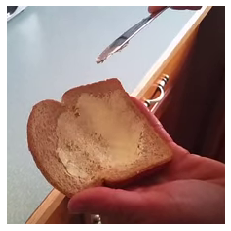

In [34]:

os.makedirs('exploration/data_inspection/figures/', exist_ok=True)

do = po.DataOptions(ct.SMTH_META_MERGED, 1.0, 'eval', pit.VideoCompose([pit.CenterCrop(224)]))
so = po.SamplingOptions(4, 1)
dataset = SmthDataset(do, so)
video, label = dataset[0]


for i, frame in enumerate(video.data):
    plt.axis('off')
    plt.imshow(frame)
    plt.savefig(f'exploration/data_inspection/figures/example_0_{i}.jpeg',bbox_inches = 'tight', pad_inches = 0)


In [35]:

os.makedirs('exploration/data_inspection/figures/', exist_ok=True)

do = po.DataOptions(ct.SMTH_META_MERGED, 1.0, 'eval', pit.VideoCompose([pit.CenterCrop(224)]))
so = po.SamplingOptions(32, 1)
dataset = SmthDataset(do, so)
video, label = dataset[0]

frames = np.concatenate([np.array(frame).reshape((1, 224, 224, 3)) for frame in video.data], axis=0)
skvideo.io.vwrite(f'exploration/data_inspection/figures/example_0.gif', frames, inputdict={
        '-framerate': '12'
    })

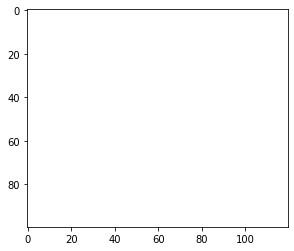

In [4]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(60):
    x += np.pi / 15.
    y += np.pi / 20.
    im = plt.imshow(f(x, y), animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

# ani.save('dynamic_images.mp4')

plt.show()

In [4]:
[train, dev, merge, test] = php.get_meta_paths('hmdb')
print(len(ghp.read_meta(train)))
print(len(ghp.read_meta(dev)))
print(len(ghp.read_meta(merge)))
print(len(ghp.read_meta(test)))


2856
714
3570
1530
